针对吴恩达课后习题K-means算法遇到了mean（）问题进行解决

# mean函数

In [1]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
arr.mean(axis=0) #按列压缩求平均

array([3., 4., 5.])

In [4]:
arr.mean(axis=1) #按行压缩求平均 

array([1., 4., 7.])

# sum函数

In [5]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
arr.sum(axis=0) #按列压缩求和

array([ 9, 12, 15])

In [7]:
arr.sum(axis=1)#按行压缩求和

array([ 3, 12, 21])

# K-means实现遇到的问题
想用mean函数进行求平均那一步

In [8]:
raw_data = sio.loadmat('datas/ex7data2.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [9]:
data = pd.DataFrame(raw_data['X'],columns=['x1','x2'])
data.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


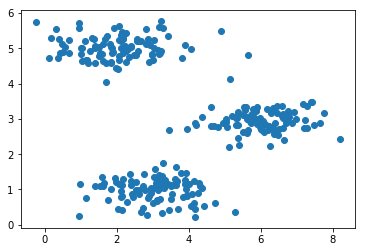

In [10]:
fig,ax = plt.subplots()
ax.scatter(data['x1'],data['x2'])
plt.show()

In [11]:
def find_closest_centroids(x,centroids):
    m = x.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((x[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [12]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
x = raw_data['X']
idx = find_closest_centroids(x, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [13]:
x.shape,x

((300, 2), array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.24399257],
        [ 1.01732013,  4.84473647],
        [ 2.17893568,  5.29758701],
        [ 2.85962615,  5.26041997],
        [ 1.308825

测试内部数据结构

In [14]:
def compute_centroids_test(x,idx,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
#         centroids[i,:] = (np.sum(x[indices,:],axis=1) / len(indices[0])).ravel()
        t_arr = x[indices,:]
#         print(t_arr.shape)
#         print(t_arr)
#         centroids[i,:] = np.mean(x[indices,:],axis=0)
    return centroids,t_arr

In [15]:
_,ta = compute_centroids_test(x,idx,3)
ta,ta.shape

(array([[[5.65858312, 4.79996405],
         [7.42892098, 3.4667949 ],
         [7.75660559, 3.15604465],
         [7.17135204, 3.4122727 ],
         [7.39807241, 3.48487031],
         [7.30278708, 3.38015979]]]), (1, 6, 2))

In [16]:
res = np.mean(ta,axis=1)
res,res.shape

(array([[7.11938687, 3.6166844 ]]), (1, 2))

In [17]:
res = np.sum(ta,axis=1) / len(ta[0])
res,res.shape

(array([[7.11938687, 3.6166844 ]]), (1, 2))

In [18]:
res = (np.sum(ta,axis=1) / len(ta[0])).ravel()
res,res.shape

(array([7.11938687, 3.6166844 ]), (2,))

找到错误原因不是mean函数理解错误，而是里面计算的数据shape的问题,这是对于数据的花式索引了解不太清楚和高维的mean函数，下面为正确的使用

In [19]:
def compute_centroids(x,idx,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
#         centroids[i,:] = (np.sum(x[indices,:],axis=1) / len(indices[0])).ravel()
        centroids[i,:] = (np.mean(x[indices,:],axis=1)).ravel()
    return centroids

In [20]:
compute_centroids(x,idx,3) 

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

花式索引问题单独学习写一章